## Visualization and Comparison Notebook for Analyses of Lick Metric Data

*  First part of notebook shows how to use functions for session level comparisons and analyses

In [1]:
from tfcrig import stats
import pandas as pd

In [2]:
# load data 
data_loc = r"C:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\aging project\tFC-rig\Analysis\test_data\cohort7_learning_d2.csv"
df = pd.read_csv(data_loc)
session_df = stats.Session(df)

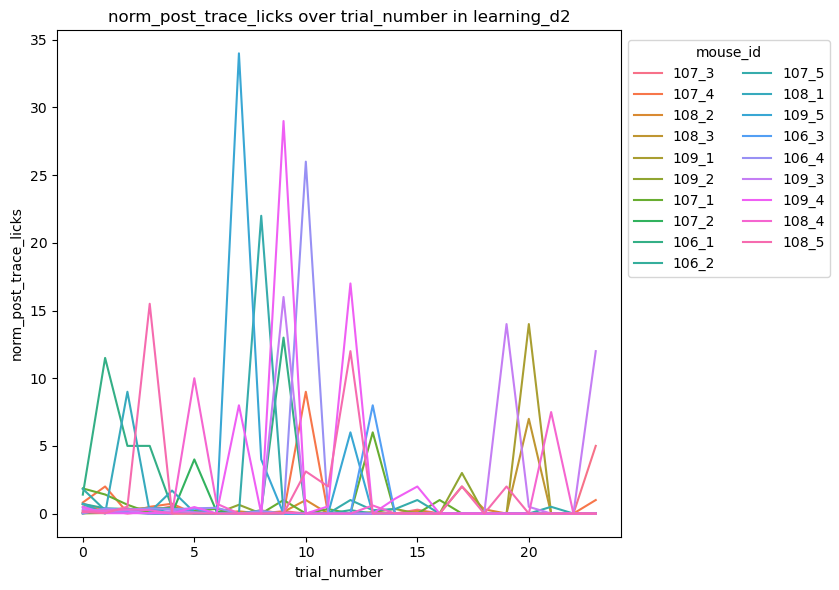

In [3]:
# plotting session data over trials 

session_df.plot_over_trials(
    y='norm_post_trace_licks',
    # x='trial_number',         # default
    # hue='mouse_id',           # default
    # title=None,               # default
    # ylabel=None,              # defaults to y
    # figsize=(10, 5)           # default size
)

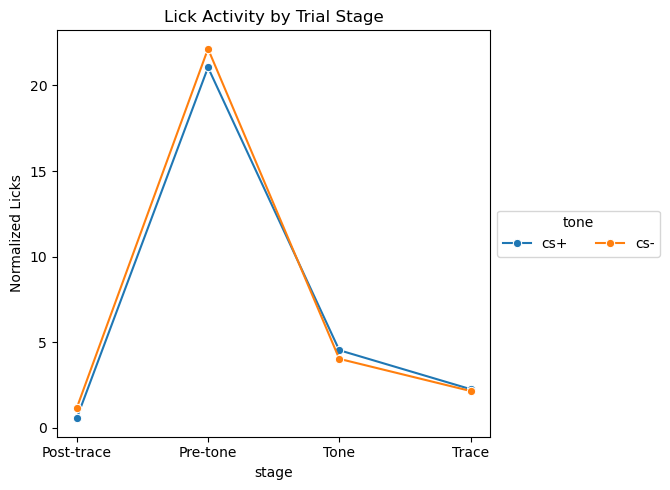

In [4]:
# plotting lick activity by different stages of the trial 

session_df.plot_trial_stages(
    stage_vars={
        "Pre-tone": "pre_tone_licks",
        "Tone": "norm_tone_licks",
        "Trace": "norm_trace_licks",
        "Post-trace": "norm_post_trace_licks"
    },
    hue="tone",  # or 'tone'
    ylabel="Normalized Licks",
    title="Lick Activity by Trial Stage"
)


*  Second part of this notebook shows cohort-level comparison functions

In [1]:
# use 
from tfcrig.helpers.batch import load_sessions_from_folder
from tfcrig import stats

folder_path = r"G:\Shared drives\Turi_lab\Data\aging_project\VIII_114(135)_115(1235)_116(1235)_117(1235)\cohort_viii_lick_results"
folder_data = load_sessions_from_folder(folder_path)

cohort_df = stats.Cohort(folder_data)

In [2]:
# realign trial number: such that trial 0 in the second session will be trial x + 1, where x is the last trial number of the first session

cohort_df.realign_trials_by_session_order([
    "lick_training", "pre_learning", "learning", "post_learning"
])


In [3]:
reward_success_rate = cohort_df.compute_reward_success_rate(groupby_cols=['mouse_id', 'session_id', 'tone', 'airpuff'],
                                                            reward_col="post_trace_licks")
reward_success_rate

,mouse_id,session_id,tone,airpuff,post_trace_licks_success_rate
0,114_1,learning_d1,cs+,no_puff,40.0
1,114_1,learning_d1,cs-,puff,20.0
2,114_1,learning_d2,cs+,no_puff,40.0
3,114_1,learning_d2,cs-,puff,50.0
4,114_1,pre_learning_d8,cs-,puff,70.0
...,...,...,...,...,...
85,117_5,learning_d1,cs-,puff,20.0
86,117_5,learning_d2,cs+,no_puff,50.0
87,117_5,learning_d2,cs-,puff,70.0
88,117_5,pre_learning_d8,cs-,puff,95.0


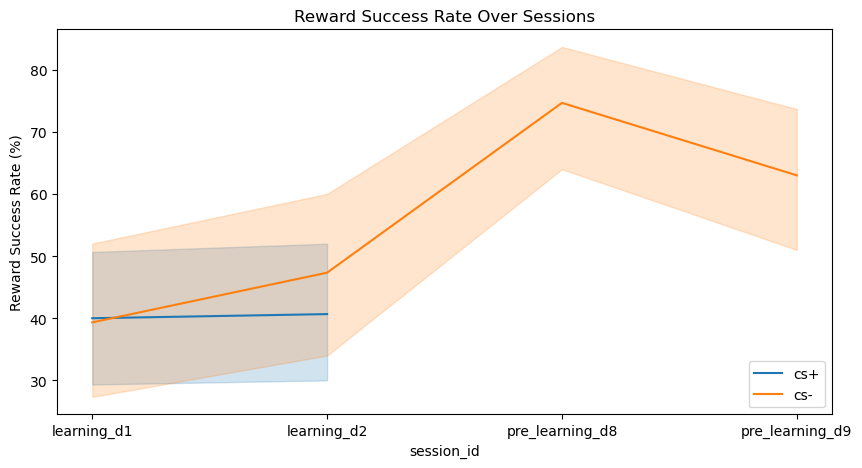

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=reward_success_rate,
    x='session_id',
    y='post_trace_licks_success_rate',
    hue='tone')
plt.title('Reward Success Rate Over Sessions')
plt.ylabel('Reward Success Rate (%)')
plt.legend(loc='lower right')